In [1]:
import sys
import h5py
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import compress 

sys.path.append('../')
from envir import config

In [2]:
config.dataFol

'/gws_gpfs/projects/project-urban_birds/workspace/share/data/'

In [3]:
pwd

'/gws_gpfs/projects/project-urban_birds/workspace/xy1443/urban_birds/explore'

### Explore the dense bird data (#1 class, 22 sensors, 4 years) 

In [2]:
def date_formatter(time):
    return datetime.datetime.fromtimestamp(float(time.split('_')[1])).strftime('%Y-%m-%d %H:%M:%S')

In [3]:
#initialize threshold
thres = 0.5

### I. Start with 1 sensor: b827eb0d8af7

In [5]:
#read in file
sensor1 = h5py.File(config.dataFol+'YAMNet/dense-bird/b827eb0d8af7_yamnet-pred-bird.h5','r')

In [131]:
sensor1['b827eb0d8af7_1487912410.99']

<HDF5 dataset "b827eb0d8af7_1487912410.99": shape (19,), type "<f4">

In [132]:
#Get all timestamps in this sensor dataset
timestamps = [date_formatter(time) for time in list(sensor.keys())]

In [133]:
#list of valid predictions by timestamp in one dictionary: {key = timestamp, value = list(valid_prediction)}
predictions = {}

#Filter all valid predictions by timestamp
for time in list(sensor1.keys()):
    timestamp = date_formatter(time)
    filter_list = list(filter(lambda x: (x >= thres) , np.array(sensor1[time]))) 
    if len(filter_list) > 0:
        predictions[timestamp] = filter_list

In [134]:
print("First ten timestamp/prediction pairs: \n" + str(dict(list(predictions.items())[0: 10]))) 


First ten timestamp/prediction pairs: 
{'2017-02-24 07:30:08': [0.5015157, 0.5081098, 0.5889772], '2017-02-24 07:33:08': [0.7603699, 0.5155673, 0.6454142, 0.6213632, 0.71562934], '2017-02-24 09:00:25': [0.6470053], '2017-02-24 19:14:48': [0.566953], '2017-02-25 06:47:01': [0.65015185, 0.71064156, 0.7327118], '2017-02-25 06:53:05': [0.89923286], '2017-02-25 07:15:47': [0.5334384], '2017-02-25 07:16:43': [0.54094154], '2017-02-25 08:01:33': [0.51921874], '2017-02-25 09:01:31': [0.51999664]}


In [135]:
len(predictions.items())

390

In [136]:
# for time,timestamp in zip(list(sensor.keys()),timestamps):
#     filter_list = list(filter(lambda x: (x >= thres) , np.array(sensor[time]))) 
#     if len(filter_list) > 0:
#         predictions[timestamp] = filter_list

In [137]:
# mean_prediction by timestamp in one dictionary: {key = timestamp, value = avg(prediction)}
mean_predictions = {}

#Filter all valid predictions by timestamp and take the average
for time in list(sensor1.keys()):
    timestamp = date_formatter(time)
    filter_list = list(filter(lambda x: (x >= thres) , np.array(sensor1[time]))) 
    if len(filter_list) > 0:
        mean_predictions[timestamp] = np.mean(filter_list)

In [138]:
print("First ten timestamp/mean_prediction pairs: \n" + str(dict(list(mean_predictions.items())[0: 10]))) 


First ten timestamp/mean_prediction pairs: 
{'2017-02-24 07:30:08': 0.53286755, '2017-02-24 07:33:08': 0.6516688, '2017-02-24 09:00:25': 0.6470053, '2017-02-24 19:14:48': 0.566953, '2017-02-25 06:47:01': 0.697835, '2017-02-25 06:53:05': 0.89923286, '2017-02-25 07:15:47': 0.5334384, '2017-02-25 07:16:43': 0.54094154, '2017-02-25 08:01:33': 0.51921874, '2017-02-25 09:01:31': 0.51999664}


In [139]:
len(mean_predictions.items())

390

In [6]:
#alternative way: instead of storing in one dictionary, store the key/pari values in two lists, pred_timestamps & pred_avgs
pred_timestamps = []
pred_avgs = []

#Filter all valid predictions by timestamp and take the average
for time in list(sensor1.keys()):
    timestamp = date_formatter(time)
    filter_list = list(filter(lambda x: (x >= thres) , np.array(sensor1[time]))) 
    if len(filter_list) > 0:
        pred_timestamps.append(timestamp)
        pred_avgs.append(np.mean(filter_list))
        

In [7]:
print("First ten timestamps: \n" + str(pred_timestamps[0: 10]))
print("First ten mean_predications : \n" + str(pred_avgs[0: 10])) 


First ten timestamps: 
['2017-02-24 07:30:08', '2017-02-24 07:33:08', '2017-02-24 09:00:25', '2017-02-24 19:14:48', '2017-02-25 06:47:01', '2017-02-25 06:53:05', '2017-02-25 07:15:47', '2017-02-25 07:16:43', '2017-02-25 08:01:33', '2017-02-25 09:01:31']
First ten mean_predications : 
[0.53286755, 0.6516688, 0.6470053, 0.566953, 0.697835, 0.89923286, 0.5334384, 0.54094154, 0.51921874, 0.51999664]


In [8]:
len(pred_timestamps)

390

### II. Try another sensor: b827eb815321

In [9]:
sensor2 = h5py.File(config.dataFol+'YAMNet/dense-bird/b827eb815321_yamnet-pred-bird.h5','r')#sonycnode-b827eb815321

In [10]:
pred_timestamps2 = []
pred_avgs2 = []

#Filter all valid predictions by timestamp and take the average
for time in list(sensor2.keys()):
    #timestamp = date_formatter(time)
    timestamp = time.split('_')[1] #=> keep the epoch time format
    filter_list = list(filter(lambda x: (x >= thres) , np.array(sensor2[time]))) 
    if len(filter_list) > 0:
        pred_timestamps2.append(timestamp)
        pred_avgs2.append(np.mean(filter_list))

In [11]:
len(pred_timestamps2)

7651

In [12]:
len(pred_avgs2)

7651

In [13]:
#combine two list into one dictionary:{key = pred_timestamps2, value = pred_avgs2}
mean_predictions2 = dict(zip(pred_timestamps2, pred_avgs2))

In [14]:
print("First ten timestamp/prediction pairs: \n" + str(dict(list(mean_predictions2.items())[0: 10]))) 


First ten timestamp/prediction pairs: 
{'1488108727.10': 0.69443905, '1488109080.95': 0.6635633, '1488109739.53': 0.6705529, '1488109916.66': 0.72397447, '1488109974.56': 0.6227698, '1488110040.87': 0.5579835, '1488110097.98': 0.6591636, '1488110158.59': 0.60169125, '1488110279.60': 0.6010338, '1488110341.11': 0.65501696}


In [102]:
# Convert the dictionary to a DataFrame
sensor2_df=pd.DataFrame(data={'datetime': pred_timestamps2})

#convert epoch time to datetime
sensor2_df['datetime'] = pd.to_datetime(sensor2_df['datetime'].values.astype(np.float64), unit='s')  
#convert utc datetime to est datetime
sensor2_df['datetime'] = sensor2_df['datetime'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
#convert est datetime to formatted string
sensor2_df['datetime'] = sensor2_df['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [103]:
sensor2_df.head()

,datetime
0,2017-02-26 06:32:07
1,2017-02-26 06:38:00
2,2017-02-26 06:48:59
3,2017-02-26 06:51:56
4,2017-02-26 06:52:54


In [135]:
#split datetime into smaller time ranges
sensor2_df['year_month_day'] = [x.split(' ')[0] for x in sensor2_df['datetime'] ]
#sensor2_df['month_day'] = [x.split(' ')[0][5:] for x in sensor2_df['datetime'] ]
sensor2_df['time'] = [x.split(' ')[1] for x in sensor2_df['datetime'] ]
sensor2_df['hour'] = [(x.split(' ')[1]).split(':')[0] for x in sensor2_df['datetime'] ]
sensor2_df['hour_min'] = [x.split(' ')[1][:5] for x in sensor2_df['datetime'] ]

#add average predication value
sensor2_df['average_pred'] = pred_avgs2


In [136]:
sensor2_df.head()

,datetime,year_month_day,time,hour_min,average_pred,hour
0,2017-02-26 06:32:07,2017-02-26,06:32:07,06:32,0.694439,06
1,2017-02-26 06:38:00,2017-02-26,06:38:00,06:38,0.663563,06
2,2017-02-26 06:48:59,2017-02-26,06:48:59,06:48,0.670553,06
3,2017-02-26 06:51:56,2017-02-26,06:51:56,06:51,0.723974,06
4,2017-02-26 06:52:54,2017-02-26,06:52:54,06:52,0.622770,06


#### Some Exploring:

In [106]:
#define a function to plot the count of avg predictions by year 
def plot_by_year(year):
    ind = [True if x.split('-')[0] == str(year) else False for x in sensor2_df['year_month_day']]
    sensor2_df_cnt = sensor2_df[ind].groupby('year_month_day')['average_pred'].count().reset_index()
    sensor2_df_cnt.rename(columns = {'year_month_day':'Day','average_pred': 'Count of Avg Predictions'}, inplace = True)
    sensor2_df_cnt.plot(x='Day',y='Count of Avg Predictions',figsize=(8,5),title='Year: '+str(year)+' Sensor: b827eb815321',legend = True)



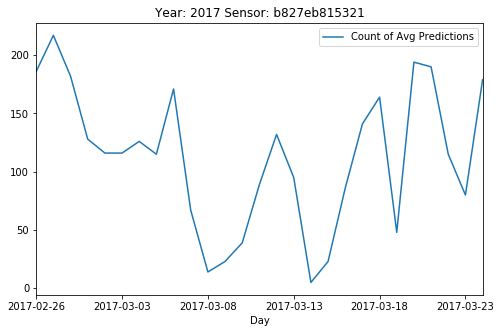

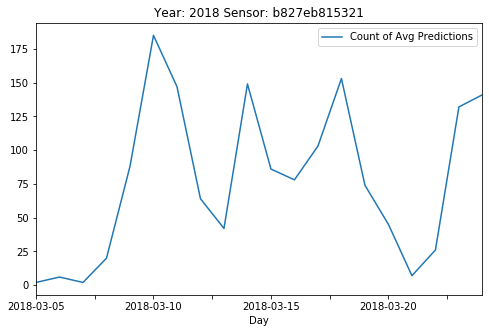

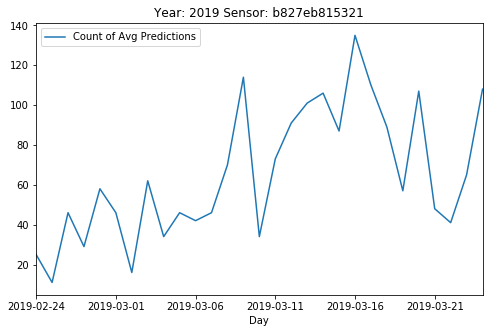

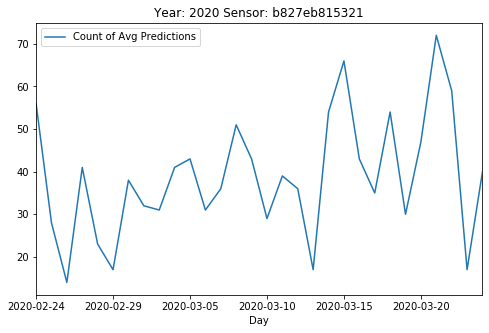

In [107]:
for year in [2017,2018,2019,2020]:
    plot_by_year(year)

In [132]:
import matplotlib.dates as mdates

def plot_by_year2(years):    
    # create a color palette
    palette = plt.get_cmap('Set1')
    fig, axs = plt.subplots(2,2, figsize=(20,10), sharey = True)
    fig.autofmt_xdate()
    num = 0
    i = 0
    for i in [0,1]:
        year = years[num]
        for j in [0,1]:
                year = years[num]
                num += 1
                ind = [True if x.split('-')[0] == str(year) else False for x in sensor2_df['year_month_day']]
                sensor2_df_cnt = sensor2_df[ind].groupby('year_month_day')['average_pred'].count().reset_index()
                sensor2_df_cnt['month_day'] = [x.split(' ')[0][5:] for x in sensor2_df_cnt['year_month_day'] ]
                sensor2_df_cnt.rename(columns = {'month_day':'Day','average_pred': 'Count of Avg Predictions'}, inplace = True)
        
                axs[i][j].plot(sensor2_df_cnt['Day'], sensor2_df_cnt['Count of Avg Predictions'], marker='',\
                         color=palette(num), linewidth=2, alpha=0.9, label='Count of Avg Predictions in '+str(year))
                axs[i][j].legend()
            
                axs[i][j].fmt_xdata = mdates.DateFormatter('%m-%d')
                for tick in axs[i][j].get_xticklabels():
                    tick.set_rotation(90)

    



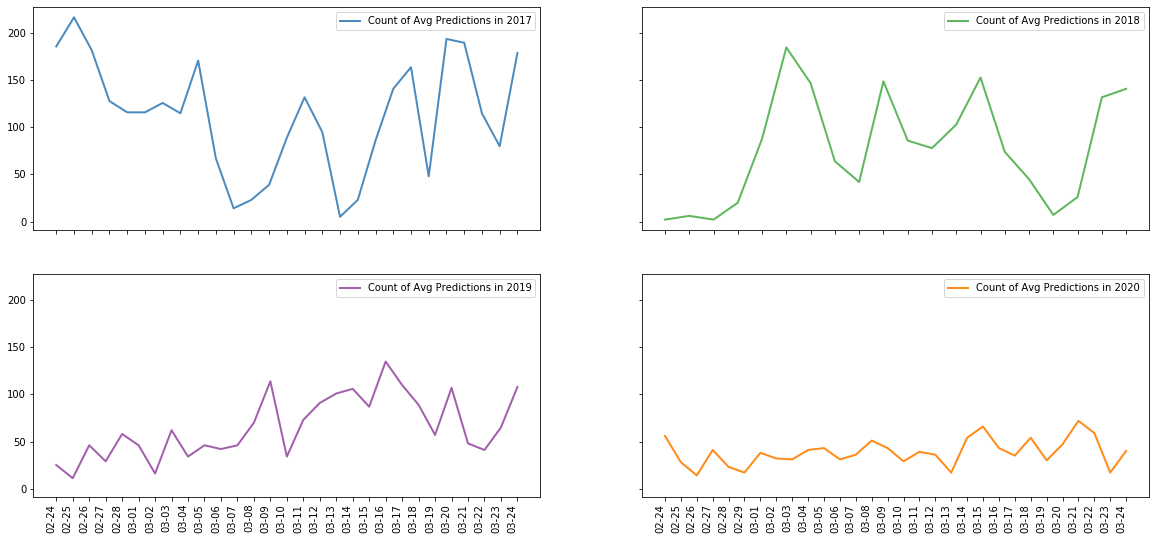

In [133]:
plot_by_year2([2017,2018,2019,2020])

In [175]:
sensor2_df.head()

,datetime,year_month_day,time,hour_min,average_pred,hour
0,2017-02-26 06:32:07,2017-02-26,06:32:07,06:32,0.694439,06
1,2017-02-26 06:38:00,2017-02-26,06:38:00,06:38,0.663563,06
2,2017-02-26 06:48:59,2017-02-26,06:48:59,06:48,0.670553,06
3,2017-02-26 06:51:56,2017-02-26,06:51:56,06:51,0.723974,06
4,2017-02-26 06:52:54,2017-02-26,06:52:54,06:52,0.622770,06


In [195]:
import matplotlib.pyplot as plt
def agg_df(year, sensor_df):
    ind = [True if x.split('-')[0] == str(year) else False for x in sensor_df['year_month_day']]
    sensor_df_temp = sensor_df[ind].groupby('year_month_day')['average_pred'].count().reset_index()
    sensor_df_temp['month_day'] = [x.split(' ')[0][5:] for x in sensor_df_temp['year_month_day'] ]
    sensor_df_temp.rename(columns = {'month_day':'Day','average_pred': 'Count of Avg_preds'}, inplace = True)
    sensor_df_temp.sort_values(by='Day')
    return sensor_df_temp

def agg_count(years, sensor_df):
    sensor_df_2017 = agg_df(2017,sensor_df)
    sensor_df_2018 = agg_df(2018,sensor_df)
    sensor_df_2019 = agg_df(2019,sensor_df)
    sensor_df_2020 = agg_df(2020,sensor_df)

    sensor_df_cnt_2017 = pd.DataFrame({'Day':sensor_df_2017['Day'], 'Count_of_Avg_pred':sensor_df_2017['Count of Avg_preds']})
    sensor_df_cnt_2018 = pd.DataFrame({'Day':sensor_df_2018['Day'], 'Count_of_Avg_pred':sensor_df_2018['Count of Avg_preds']})
    sensor_df_cnt_2019 = pd.DataFrame({'Day':sensor_df_2019['Day'], 'Count_of_Avg_pred':sensor_df_2019['Count of Avg_preds']})
    sensor_df_cnt_2020 = pd.DataFrame({'Day':sensor_df_2020['Day'], 'Count_of_Avg_pred':sensor_df_2020['Count of Avg_preds']})
    
    return sensor_df_cnt_2017,sensor_df_cnt_2018,sensor_df_cnt_2019,sensor_df_cnt_2020


In [196]:
sensor2_df_cnt1, sensor2_df_cnt2,sensor2_df_cnt3, sensor2_df_cnt4= agg_count([2017,2018,2019,2020], sensor2_df)

In [197]:
sensor2_df_cnt1.head()

,Day,Count_of_Avg_pred
0,02-26,186
1,02-27,217
2,02-28,182
3,03-01,128
4,03-02,116


In [198]:
sensor2_df_cnt2.head()

,Day,Count_of_Avg_pred
0,03-05,2
1,03-06,6
2,03-07,2
3,03-08,20
4,03-09,88


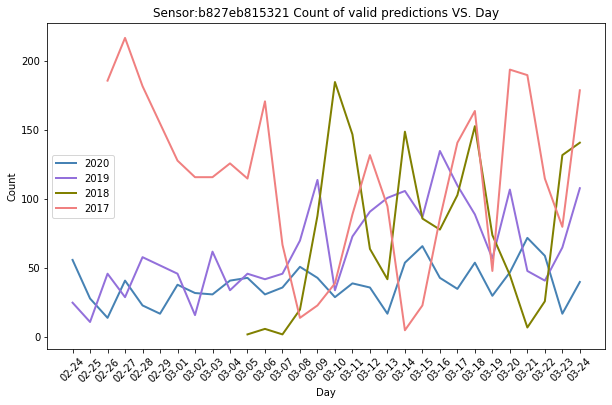

In [227]:
# multiple line plot
plt.figure(figsize=(10,6))
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor2_df_cnt4, marker='', color='steelblue', linewidth=2, label="2020")
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor2_df_cnt3, marker='', color='mediumpurple', linewidth=2, label="2019")
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor2_df_cnt2, marker='', color='olive', linewidth=2, label="2018")
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor2_df_cnt1, marker='', color='lightcoral', linewidth=2,label="2017")

plt.xticks(rotation=45)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Sensor:b827eb815321 Count of valid predictions VS. Day')
plt.legend()


### Visualize by Hour

Text(0, 0.5, 'Count')

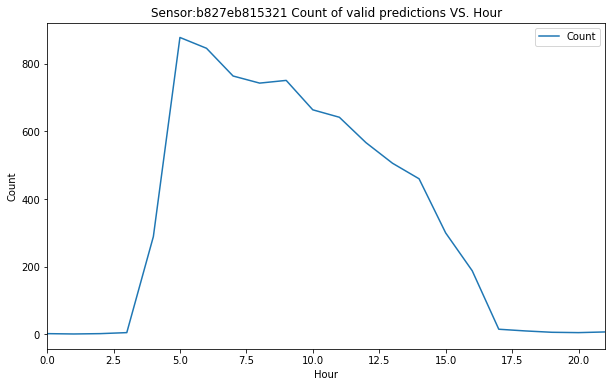

In [275]:
# count(average_pred) vs. Hour
hour_cnt2 = sensor2_df.groupby('hour')['average_pred'].count().reset_index()
hour_cnt2.rename(columns = {'hour': 'Hour', 'average_pred': 'Count'}, inplace = True)
ax2 = hour_cnt2.plot(figsize=(10,6), title ='Sensor:b827eb815321 Count of valid predictions VS. Hour')
ax2.set_xlabel("Hour")
ax2.set_ylabel("Count")

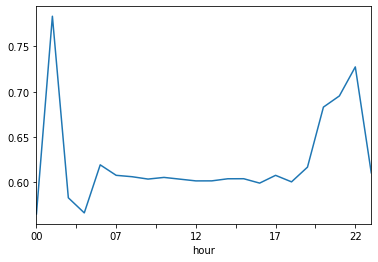

In [139]:
# mean(average_pred) vs. Hour
sensor2_df.groupby('hour')['average_pred'].mean().plot()   #---> does not help much


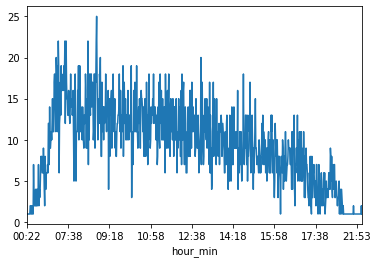

In [140]:
# count(average_pred) vs. hour_min

plt = sensor2_df.groupby('hour_min')['average_pred'].count().plot()

#### Potential Peaks Observed from kokx radar scan （annual mtr by month)
Feb.
- 2/9/2017
- 2/2/2018, 2/5/2018, 2/7/2018, 2/18/2018
- 2/21/2019

March
- 3/10/2017
- 3/2/2018, 3/8/2018, 3/22/2018
- 3/4/2019, 3/16/2019

In [219]:
def plot_by_day(possible_peak_days):
    for day in possible_peak_days:
        try:
            plt = sensor2_df[sensor2_df['year_month_day'] == day].plot(x='time',y='average_pred',figsize=(10,5),title='Sensor: b827eb815321 Day: '+day,legend = True)
            #df.plot(x='A', y='B')
        except:
            print('Day: '+day+' has no numeric data to plot')

Day: 2018-02-25 has no numeric data to plot
Day: 2018-02-29 has no numeric data to plot
Day: 2018-02-24 has no numeric data to plot
Day: 2018-02-25 has no numeric data to plot
Day: 2019-02-29 has no numeric data to plot


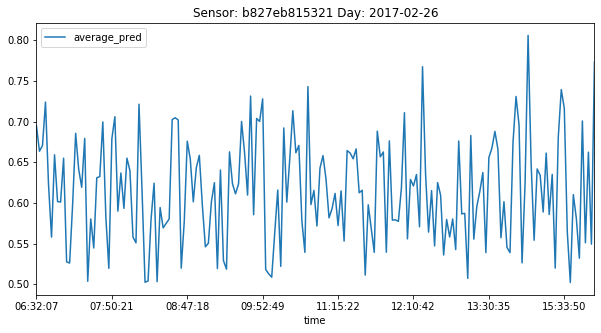

In [220]:
#For Feburary
possible_peak_days = ['2017-02-26','2018-02-25','2018-02-29','2018-02-24','2018-02-25','2019-02-29']
#sensor2_0226 = sensor2_df[sensor2_df['day'] == '2017-02-26']
plot_by_day(possible_peak_days)

In [221]:
sensor2_df[sensor2_df['year_month_day'] == '2017-02-26'].head()

,datetime,year_month_day,time,hour_min,average_pred,hour
0,2017-02-26 06:32:07,2017-02-26,06:32:07,06:32,0.694439,06
1,2017-02-26 06:38:00,2017-02-26,06:38:00,06:38,0.663563,06
2,2017-02-26 06:48:59,2017-02-26,06:48:59,06:48,0.670553,06
3,2017-02-26 06:51:56,2017-02-26,06:51:56,06:51,0.723974,06
4,2017-02-26 06:52:54,2017-02-26,06:52:54,06:52,0.622770,06


In [218]:
#2018-02-26: shows no predication values above the threshold
sensor2_df[sensor2_df['year_month_day'] == '2018-02-26']

,datetime,year_month_day,time,hour_min,average_pred,hour


Day: 2018-03-02 has no numeric data to plot


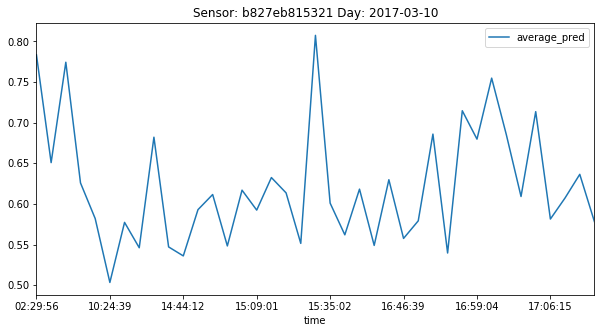

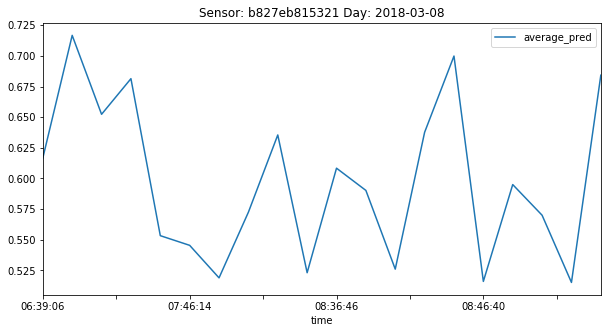

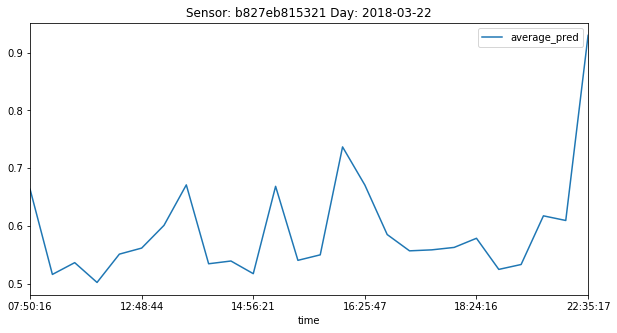

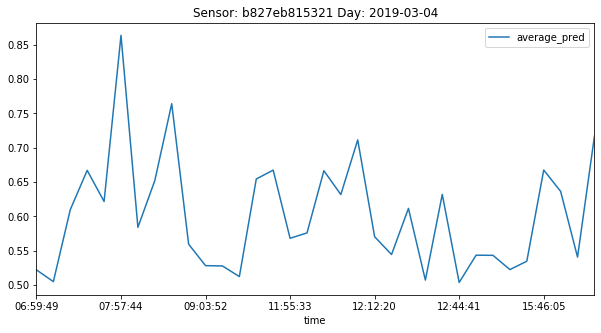

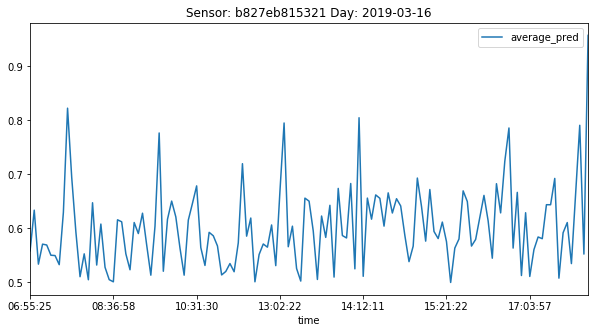

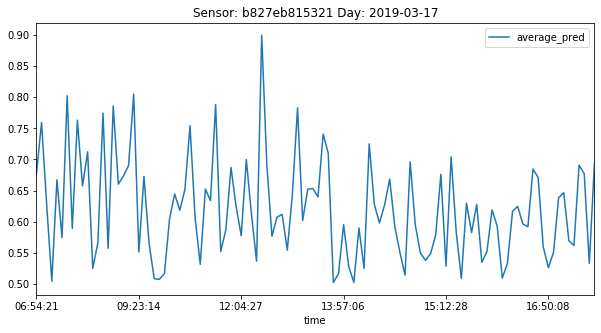

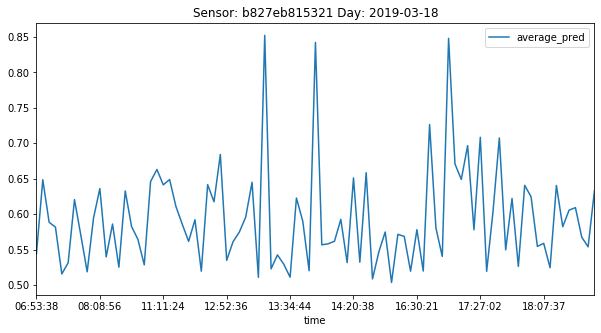

In [303]:
#For March
possible_peak_days = ['2017-03-10','2018-03-02','2018-03-08','2018-03-22','2019-03-04',\
                      '2019-03-16','2019-03-17','2019-03-18']
plot_by_day(possible_peak_days)

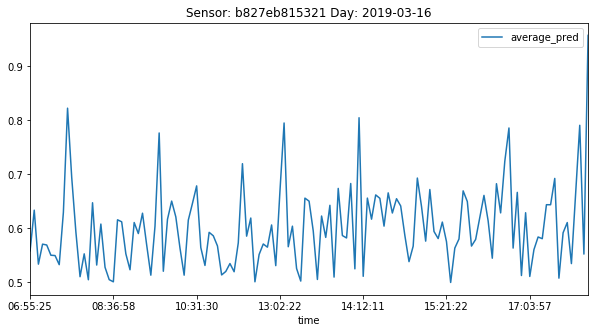

In [292]:
sensor2_df[sensor2_df['year_month_day'] == '2019-03-16'].plot(x='time',y='average_pred',\
                        figsize=(10,5),title='Sensor: b827eb815321 Day: 2019-03-16',legend = True)


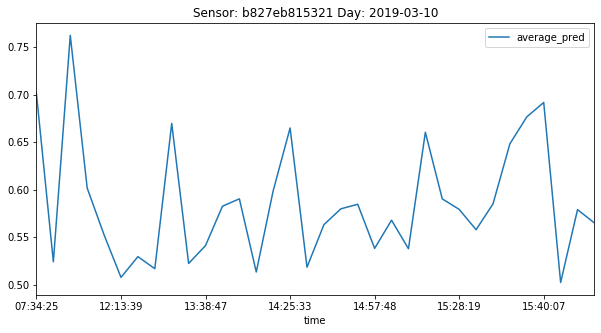

In [307]:
sensor2_df[sensor2_df['year_month_day'] == '2019-03-10'].plot(x='time',y='average_pred',\
                        figsize=(10,5),title='Sensor: b827eb815321 Day: 2019-03-10',legend = True)


In [299]:
sensor2_df[sensor2_df['year_month_day'] == '2019-03-16'].shape

(135, 6)

In [305]:
sensor2_df[sensor2_df['year_month_day'] == '2019-03-10'].shape

(34, 6)

#### II. For the rest 4 sensors

In [46]:
from os import listdir
from os.path import isfile, join

#Add all files under 'YAMNet/dense-bird' to a list
#yamNetFiles = [f for f in listdir(config.dataFol+'YAMNet/dense-bird') if isfile(join(config.dataFol+'YAMNet/dense-bird', f))]


In [228]:
yamNetFiles = ['b827eb8e2420_yamnet-pred-bird.h5','b827eb905497_yamnet-pred-bird.h5', 'b827eb0fedda_yamnet-pred-bird.h5',
 'b827eb1685c7_yamnet-pred-bird.h5']


In [231]:
thres = 0.5
def process_file(file):
    sensor2 = h5py.File(config.dataFol+'YAMNet/dense-bird/'+file,'r')

    pred_timestamps2 = []
    pred_avgs2 = []

    #Filter all valid predictions by timestamp and take the average
    for time in list(sensor2.keys()):
        #timestamp = date_formatter(time)
        timestamp = time.split('_')[1] #=> keep the epoch time format
        filter_list = list(filter(lambda x: (x >= thres) , np.array(sensor2[time]))) 
        if len(filter_list) > 0:
            pred_timestamps2.append(timestamp)
            pred_avgs2.append(np.mean(filter_list))
    
    # Convert the dictionary to a DataFrame
    sensor2_df=pd.DataFrame(data={'datetime': pred_timestamps2})

    #convert epoch time to datetime
    sensor2_df['datetime'] = pd.to_datetime(sensor2_df['datetime'].values.astype(np.float64), unit='s')  
    #convert utc datetime to est datetime
    sensor2_df['datetime'] = sensor2_df['datetime'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
    #convert est datetime to formatted string
    sensor2_df['datetime'] = sensor2_df['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

    #split datetime into smaller time ranges
    sensor2_df['year_month_day'] = [x.split(' ')[0] for x in sensor2_df['datetime'] ]
    #sensor2_df['month_day'] = [x.split(' ')[0][5:] for x in sensor2_df['datetime'] ]
    sensor2_df['time'] = [x.split(' ')[1] for x in sensor2_df['datetime'] ]
    sensor2_df['hour'] = [(x.split(' ')[1]).split(':')[0] for x in sensor2_df['datetime'] ]
    sensor2_df['hour_min'] = [x.split(' ')[1][:5] for x in sensor2_df['datetime'] ]

    #add average predication value
    sensor2_df['average_pred'] = pred_avgs2
    sensor2_df.head()
    return sensor2_df

In [232]:
sensor3_df = process_file('b827eb8e2420_yamnet-pred-bird.h5')

In [234]:
sensor3_df.head()

,datetime,year_month_day,time,hour,hour_min,average_pred
0,2017-03-13 19:30:29,2017-03-13,19:30:29,19,19:30,0.556343
1,2017-03-14 07:20:18,2017-03-14,07:20:18,07,07:20,0.607350
2,2017-03-14 07:22:18,2017-03-14,07:22:18,07,07:22,0.952605
3,2017-03-14 12:41:04,2017-03-14,12:41:04,12,12:41,0.578531
4,2017-03-14 12:50:51,2017-03-14,12:50:51,12,12:50,0.535372


In [235]:
sensor3_df_cnt1, sensor3_df_cnt2,sensor3_df_cnt3, sensor3_df_cnt4= agg_count([2017,2018,2019,2020], sensor3_df)

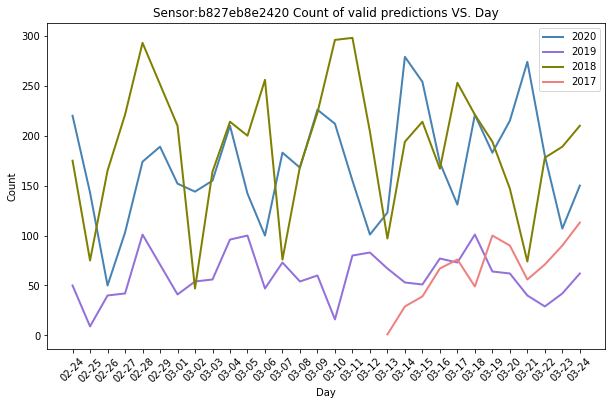

In [252]:
# multiple line plot
plt.figure(figsize=(10,6))
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor3_df_cnt4, marker='', color='steelblue', linewidth=2, label="2020")
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor3_df_cnt3, marker='', color='mediumpurple', linewidth=2, label="2019")
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor3_df_cnt2, marker='', color='olive', linewidth=2, label="2018")
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor3_df_cnt1, marker='', color='lightcoral', linewidth=2,label="2017")

plt.xticks(rotation=45)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Sensor:b827eb8e2420 Count of valid predictions VS. Day')
plt.legend()


Text(0, 0.5, 'Count')

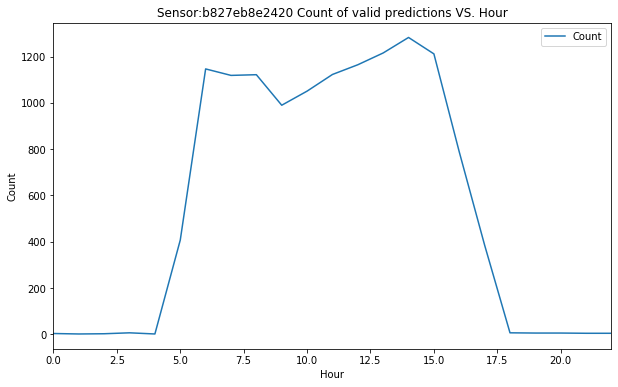

In [276]:
# count(average_pred) vs. Hour
hour_cnt3 = sensor3_df.groupby('hour')['average_pred'].count().reset_index()
hour_cnt3.rename(columns = {'hour': 'Hour', 'average_pred': 'Count'}, inplace = True)
ax3 = hour_cnt3.plot(figsize=(10,6), title ='Sensor:b827eb8e2420 Count of valid predictions VS. Hour')
ax3.set_xlabel("Hour")
ax3.set_ylabel("Count")

In [239]:
sensor4_df = process_file('b827eb905497_yamnet-pred-bird.h5')

In [240]:
sensor4_df.head()

,datetime,year_month_day,time,hour,hour_min,average_pred
0,2017-03-15 11:27:17,2017-03-15,11:27:17,11,11:27,0.625783
1,2017-03-15 13:09:58,2017-03-15,13:09:58,13,13:09,0.513210
2,2017-03-15 13:10:55,2017-03-15,13:10:55,13,13:10,0.612982
3,2017-03-15 13:16:56,2017-03-15,13:16:56,13,13:16,0.660448
4,2017-03-15 13:44:59,2017-03-15,13:44:59,13,13:44,0.829948


In [246]:
sensor4_df_cnt1, sensor4_df_cnt2,sensor4_df_cnt3, sensor4_df_cnt4= agg_count([2017,2018,2019,2020], sensor4_df)

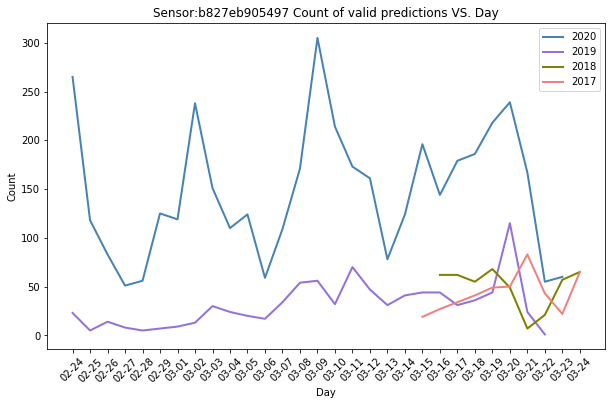

In [247]:
# multiple line plot
plt.figure(figsize=(10,6))
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor4_df_cnt4, marker='', color='steelblue', linewidth=2, label="2020")
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor4_df_cnt3, marker='', color='mediumpurple', linewidth=2, label="2019")
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor4_df_cnt2, marker='', color='olive', linewidth=2, label="2018")
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor4_df_cnt1, marker='', color='lightcoral', linewidth=2,label="2017")

plt.xticks(rotation=45)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Sensor:b827eb905497 Count of valid predictions VS. Day')
plt.legend()


Text(0, 0.5, 'Count')

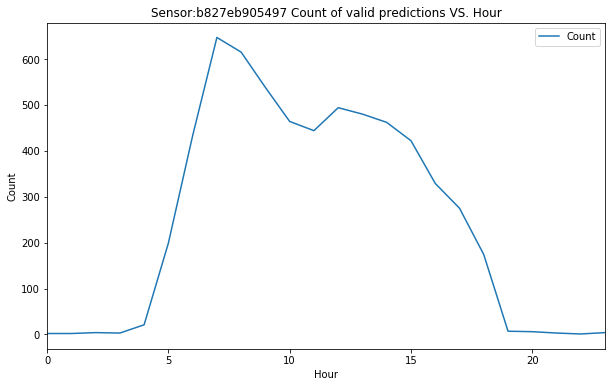

In [278]:
# count(average_pred) vs. Hour
hour_cnt4 = sensor4_df.groupby('hour')['average_pred'].count().reset_index()
hour_cnt4.rename(columns = {'hour': 'Hour', 'average_pred': 'Count'}, inplace = True)
ax4 = hour_cnt4.plot(figsize=(10,6), title ='Sensor:b827eb905497 Count of valid predictions VS. Hour')
ax4.set_xlabel("Hour")
ax4.set_ylabel("Count")

In [250]:
sensor5_df = process_file('b827eb0fedda_yamnet-pred-bird.h5')

In [251]:
sensor5_df.head()

,datetime,year_month_day,time,hour,hour_min,average_pred
0,2017-02-24 15:40:31,2017-02-24,15:40:31,15,15:40,0.528898
1,2017-02-24 16:29:51,2017-02-24,16:29:51,16,16:29,0.551928
2,2017-02-24 16:30:51,2017-02-24,16:30:51,16,16:30,0.651554
3,2017-02-24 16:31:50,2017-02-24,16:31:50,16,16:31,0.573084
4,2017-02-24 16:32:52,2017-02-24,16:32:52,16,16:32,0.522751


In [253]:
sensor5_df_cnt1, sensor5_df_cnt2,sensor5_df_cnt3, sensor5_df_cnt4= agg_count([2017,2018,2019,2020], sensor5_df)

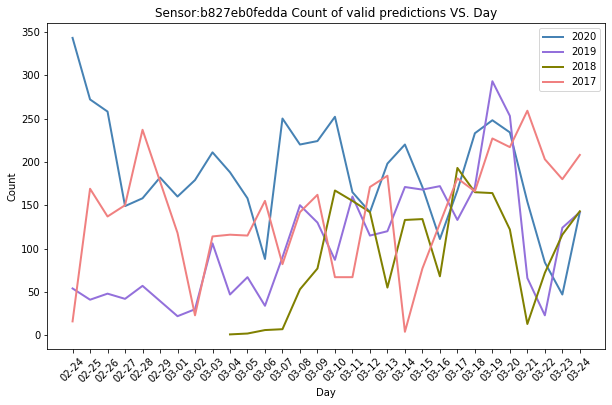

In [260]:
# multiple line plot
plt.figure(figsize=(10,6))
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor5_df_cnt4, marker='', color='steelblue', linewidth=2, label="2020")
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor5_df_cnt3, marker='', color='mediumpurple', linewidth=2, label="2019")
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor5_df_cnt2, marker='', color='olive', linewidth=2, label="2018")
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor5_df_cnt1, marker='', color='lightcoral', linewidth=2,label="2017")

plt.xticks(rotation=45)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Sensor:b827eb0fedda Count of valid predictions VS. Day')
plt.legend()


Text(0, 0.5, 'Count')

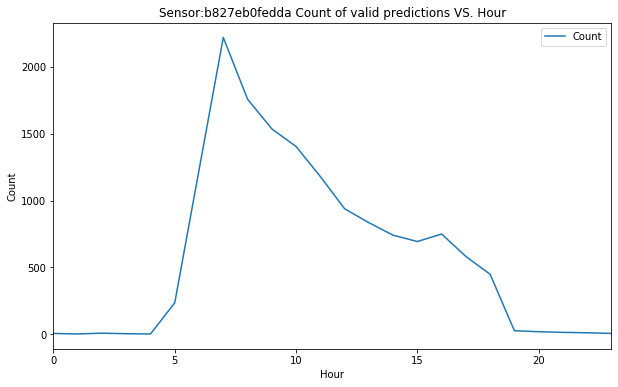

In [279]:
# count(average_pred) vs. Hour
hour_cnt5 = sensor5_df.groupby('hour')['average_pred'].count().reset_index()
hour_cnt5.rename(columns = {'hour': 'Hour', 'average_pred': 'Count'}, inplace = True)
ax5 = hour_cnt5.plot(figsize=(10,6), title ='Sensor:b827eb0fedda Count of valid predictions VS. Hour')
ax5.set_xlabel("Hour")
ax5.set_ylabel("Count")

In [256]:
sensor6_df = process_file('b827eb1685c7_yamnet-pred-bird.h5')

In [257]:
sensor6_df.head()

,datetime,year_month_day,time,hour,hour_min,average_pred
0,2017-02-24 05:31:14,2017-02-24,05:31:14,05,05:31,0.575413
1,2017-02-24 05:38:06,2017-02-24,05:38:06,05,05:38,0.541689
2,2017-02-24 05:41:02,2017-02-24,05:41:02,05,05:41,0.526690
3,2017-02-24 05:47:16,2017-02-24,05:47:16,05,05:47,0.500499
4,2017-02-24 05:58:21,2017-02-24,05:58:21,05,05:58,0.529773


In [258]:
sensor6_df_cnt1, sensor6_df_cnt2,sensor6_df_cnt3, sensor6_df_cnt4= agg_count([2017,2018,2019,2020], sensor6_df)

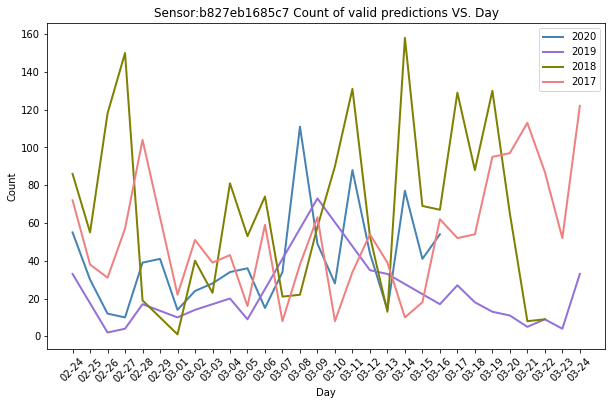

In [259]:
# multiple line plot
plt.figure(figsize=(10,6))
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor6_df_cnt4, marker='', color='steelblue', linewidth=2, label="2020")
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor6_df_cnt3, marker='', color='mediumpurple', linewidth=2, label="2019")
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor6_df_cnt2, marker='', color='olive', linewidth=2, label="2018")
plt.plot( 'Day', 'Count_of_Avg_pred', data=sensor6_df_cnt1, marker='', color='lightcoral', linewidth=2,label="2017")

plt.xticks(rotation=45)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Sensor:b827eb1685c7 Count of valid predictions VS. Day')
plt.legend()

Text(0, 0.5, 'Count')

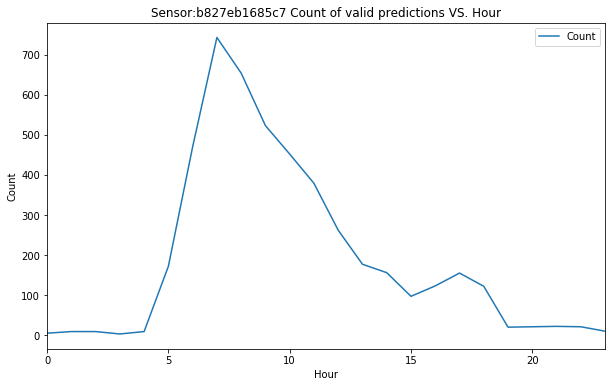

In [281]:
# count(average_pred) vs. Hour
hour_cnt6 = sensor6_df.groupby('hour')['average_pred'].count().reset_index()
hour_cnt6.rename(columns = {'hour': 'Hour', 'average_pred': 'Count'}, inplace = True)
ax6 = hour_cnt6.plot(figsize=(10,6), title ='Sensor:b827eb1685c7 Count of valid predictions VS. Hour')
ax6.set_xlabel("Hour")
ax6.set_ylabel("Count")

In [4]:
sensor_siren = h5py.File(config.dataFol+'YAMNet/dense-521/b827ebe3b72c_yamnet-pred.h5','r')


In [5]:
sensor_siren.keys()

<KeysViewHDF5 ['b827ebe3b72c_1582520436.21', 'b827ebe3b72c_1582520783.56', 'b827ebe3b72c_1582521216.71', 'b827ebe3b72c_1582521462.74', 'b827ebe3b72c_1582521691.07', 'b827ebe3b72c_1582522029.11', 'b827ebe3b72c_1582522372.06', 'b827ebe3b72c_1582522716.40', 'b827ebe3b72c_1582522904.82', 'b827ebe3b72c_1582523218.26', 'b827ebe3b72c_1582523495.40', 'b827ebe3b72c_1582523822.74', 'b827ebe3b72c_1582524106.07', 'b827ebe3b72c_1582524417.31', 'b827ebe3b72c_1582524789.76', 'b827ebe3b72c_1582525125.00', 'b827ebe3b72c_1582525484.54', 'b827ebe3b72c_1582525763.48', 'b827ebe3b72c_1582526128.72', 'b827ebe3b72c_1582526463.77', 'b827ebe3b72c_1582526706.80', 'b827ebe3b72c_1582526952.43', 'b827ebe3b72c_1582527242.06', 'b827ebe3b72c_1582527549.70', 'b827ebe3b72c_1582527856.24', 'b827ebe3b72c_1582528106.17', 'b827ebe3b72c_1582528340.20', 'b827ebe3b72c_1582528706.34', 'b827ebe3b72c_1582529028.98', 'b827ebe3b72c_1582529360.32', 'b827ebe3b72c_1582529726.97', 'b827ebe3b72c_1582530088.52', 'b827ebe3b72c_1582530354.

In [10]:
key1 = np.array(sensor_siren['b827ebe3b72c_1582520436.21'])

In [12]:
key1.shape

(19, 521)

In [13]:
key1[0]

array([3.54399942e-02, 5.63647551e-03, 8.52526457e-04, 1.49475108e-03,
       1.60471478e-03, 5.61298977e-04, 1.57062910e-04, 3.65400592e-06,
       7.16794530e-05, 8.44414046e-07, 2.28852215e-10, 2.32092585e-04,
       1.05979340e-02, 5.08940173e-03, 2.44305935e-04, 1.33936026e-03,
       6.77363016e-04, 2.91331991e-04, 3.47062293e-03, 1.51794301e-02,
       3.04527162e-03, 1.67254098e-02, 3.16048041e-03, 3.52098234e-02,
       4.51784523e-04, 3.75609343e-05, 2.39122585e-07, 4.41605720e-04,
       4.49903222e-04, 1.36109651e-04, 3.19983155e-05, 1.35679060e-04,
       2.55303075e-05, 1.44958415e-03, 4.52340864e-05, 5.05435892e-05,
       1.28443271e-01, 1.05891917e-02, 2.82654818e-02, 4.91503403e-02,
       1.20466051e-04, 6.31197989e-02, 2.66524442e-02, 1.82009879e-02,
       5.06129935e-02, 1.78555390e-04, 7.86568271e-05, 1.01530577e-05,
       1.01246791e-04, 9.75122020e-05, 1.98324437e-06, 2.83811005e-06,
       4.06077015e-05, 3.13488790e-03, 4.34401892e-02, 4.24904458e-04,
      